In [43]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [57]:
sud = cv2.imread("sudoku.png")

In [58]:
sud.astype("float64").dtype

dtype('float64')

In [59]:
sud = cv2.resize(sud,(252,252))

In [60]:
sud = cv2.cvtColor(sud,cv2.COLOR_BGR2GRAY)
(thresh, sud) = cv2.threshold(sud, 150, 255, cv2.THRESH_BINARY_INV)

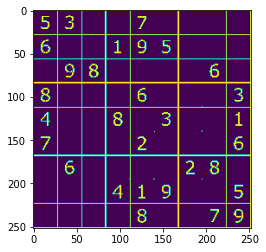

In [61]:
plt.imshow(sud)

In [62]:
print(sud.shape)

(252, 252)


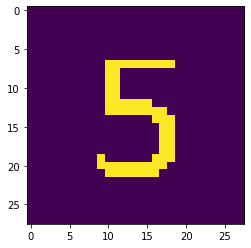

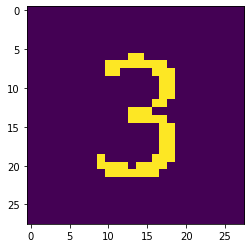

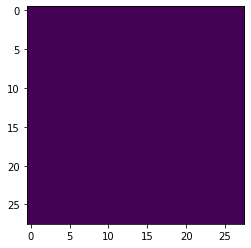

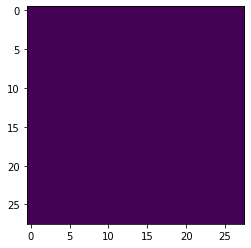

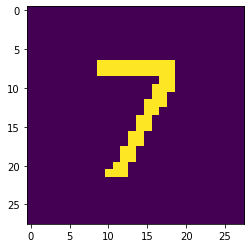

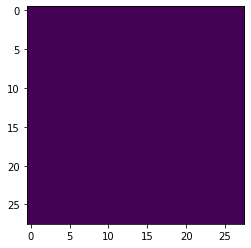

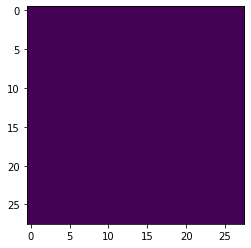

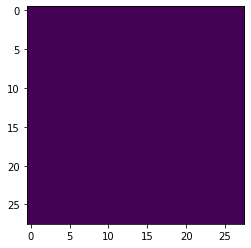

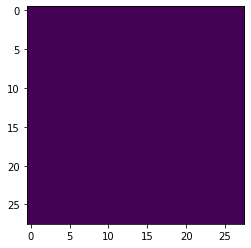

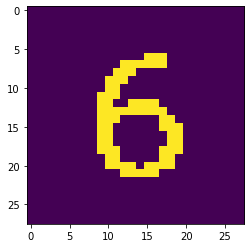

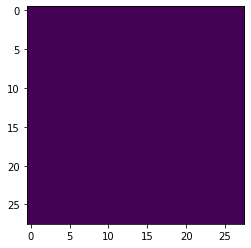

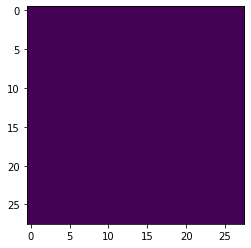

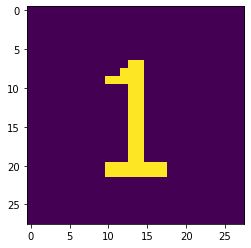

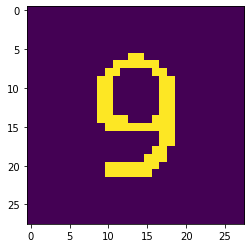

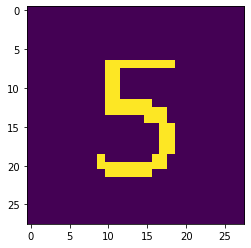

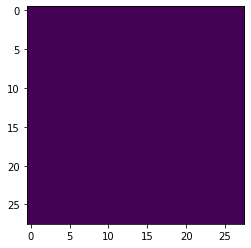

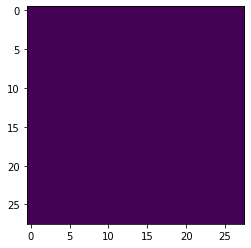

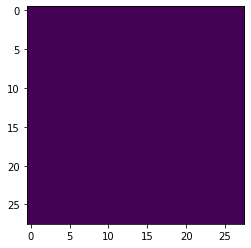

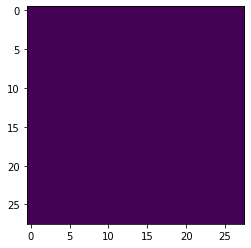

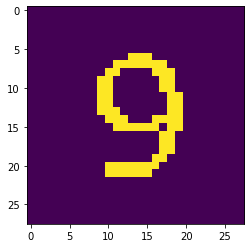

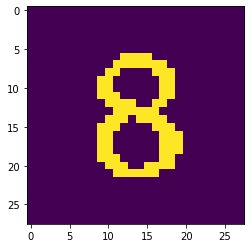

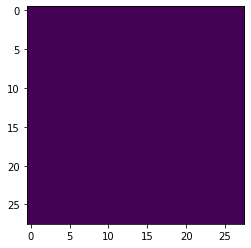

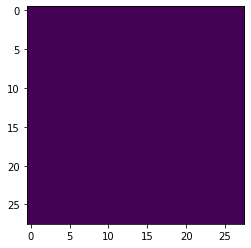

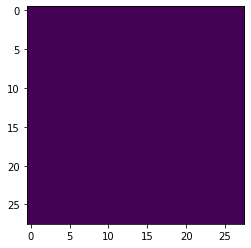

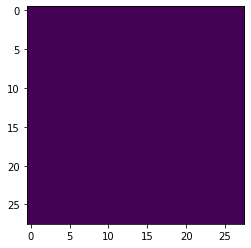

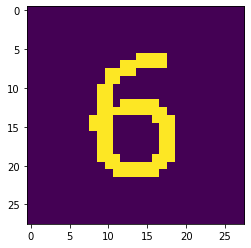

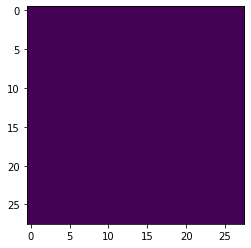

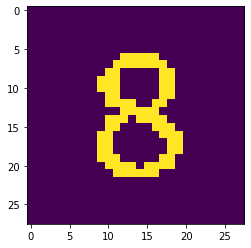

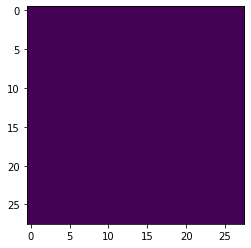

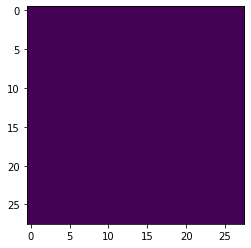

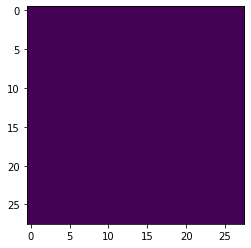

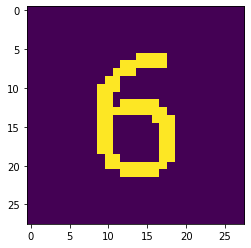

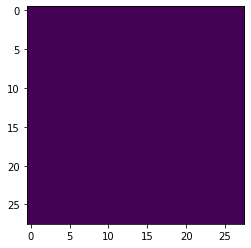

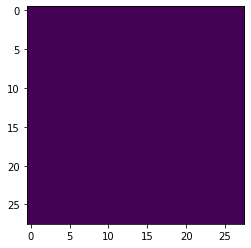

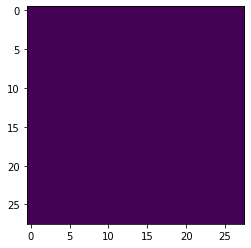

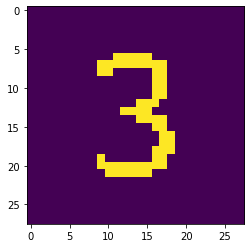

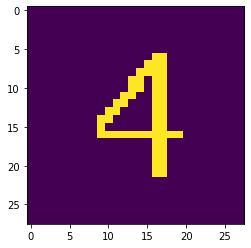

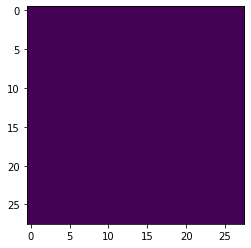

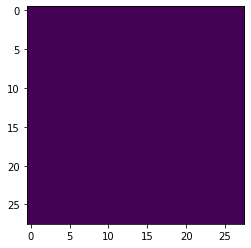

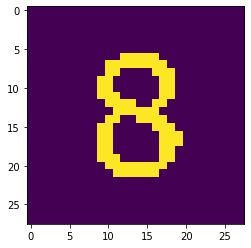

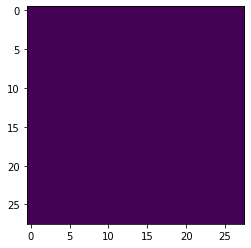

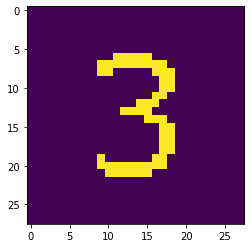

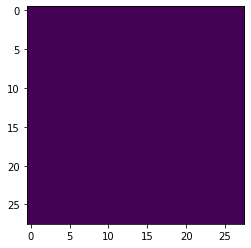

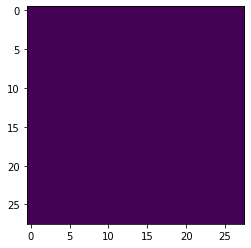

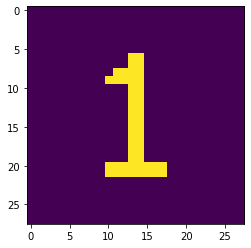

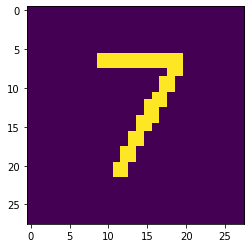

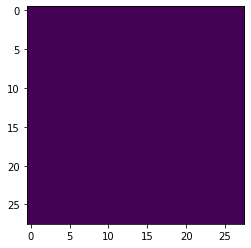

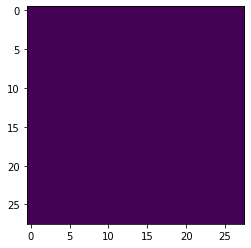

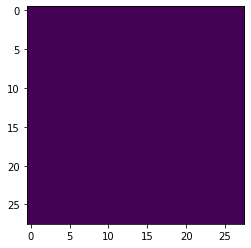

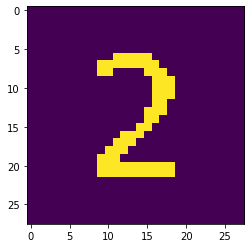

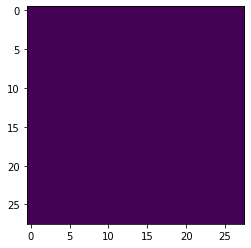

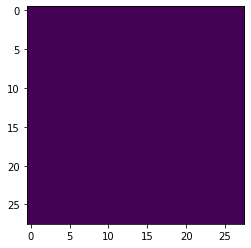

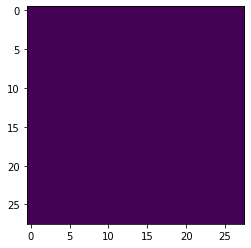

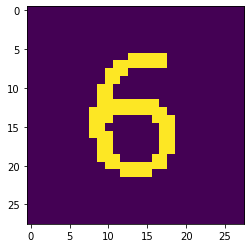

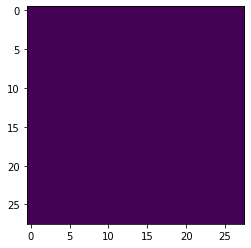

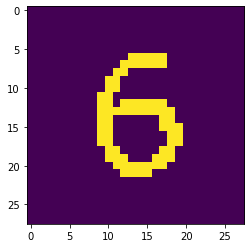

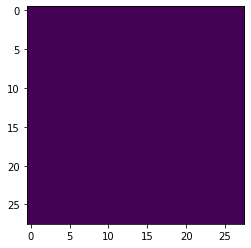

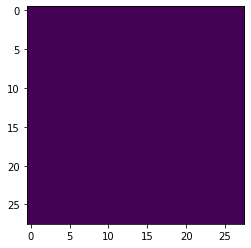

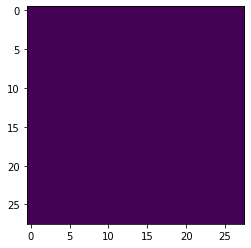

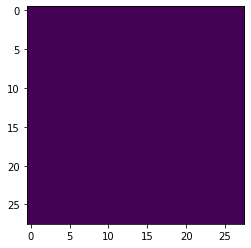

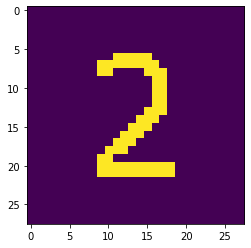

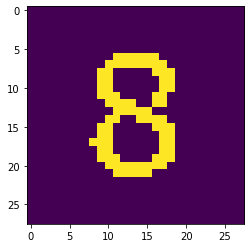

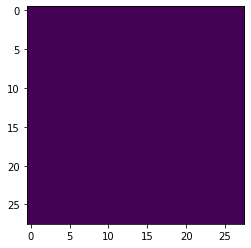

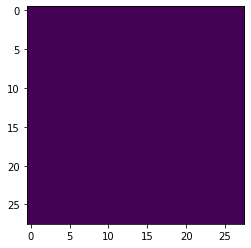

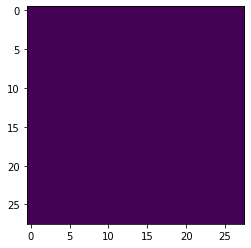

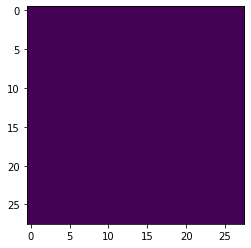

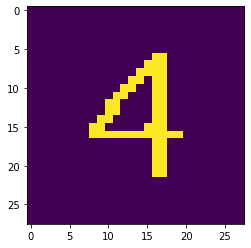

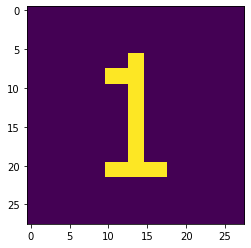

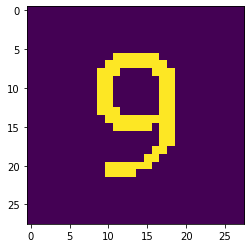

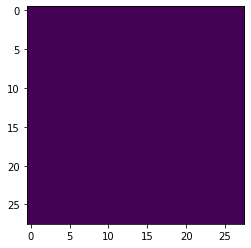

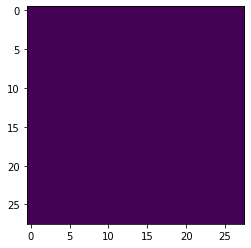

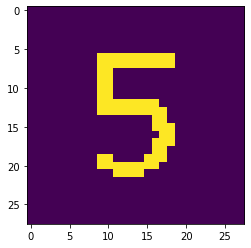

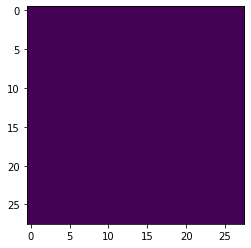

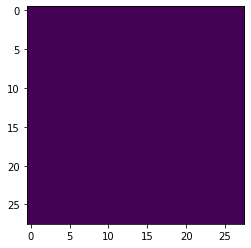

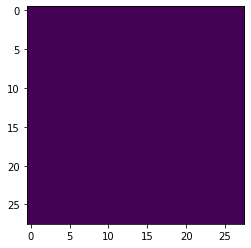

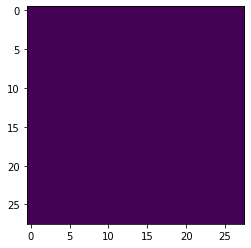

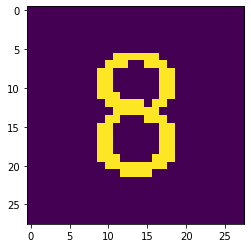

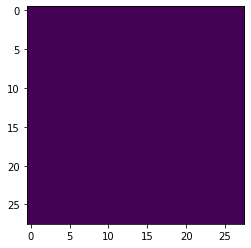

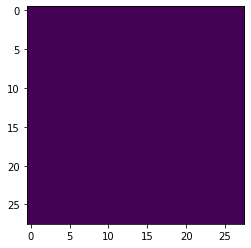

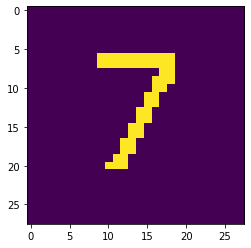

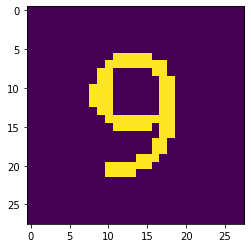

In [77]:
cells = []

for r in range(0,252,28):
    for c in range(0,252,28):
        im = sud[r:r+28][:,c:c+28]
        pad = np.zeros(im.shape)
        pad[2:-2][:,2:-2] = sud[r+2:r+26][:,c+2:c+26]
        cells.append(pad)
        plt.imshow(pad)
        #print(sud[r:r+28][:,c:c+28])
        plt.show()
        
        

In [81]:
cells = np.array(cells)
cells.shape
cells = cells.reshape((-1,28,28,1))
cells.shape

(81, 28, 28, 1)

In [66]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
import datetime
import numpy as np

In [68]:
model = keras.models.load_model("drec")

In [82]:
pred = model.predict_classes(cells,verbose = 1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
3/3 [==============================] - 0s 12ms/step


In [83]:
pred

array([5, 3, 0, 0, 7, 0, 0, 0, 0, 6, 0, 0, 1, 9, 5, 0, 0, 0, 0, 9, 8, 0,
       0, 0, 0, 5, 0, 8, 0, 0, 0, 6, 0, 0, 0, 3, 4, 0, 0, 8, 0, 3, 0, 0,
       1, 7, 0, 0, 0, 2, 0, 0, 0, 5, 0, 6, 0, 0, 0, 0, 2, 8, 0, 0, 0, 0,
       4, 1, 9, 0, 0, 5, 0, 0, 0, 0, 8, 0, 0, 7, 9])